# Data exploration

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relationships in the data set. Specifically, by using visualization when you approach a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships
- Use plot aesthetics to project multiple dimensions 
- Apply conditioning or faceting methods to project multiple dimensions

This notebook contains an introduction to the methods data scientists use to prepare and explore a data set. Data scientists spend a lot of time manipulating data to clean and prepare it (**data munging**) and to understand the relationships within the variables in the data (**data exploration**). Visualization is a key skill for any data scientist performing these tasks. 

Before performing any type of inference or machine learning on a data set, you should develop an understanding of the relationships in the data set. Skipping this step can lead to wasted time from unexpected problems when building models, or in constructing models with poor performance. When starting any data science project, it is a good idea to plan on spending considerable time exploring the data. These exploration steps are often performed in conjunction with data cleaning and preparing, as visualization often highlights problems with data.

In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc = {'figure.figsize': (10, 8)})

### About the data set

This data set is from the [Univeristy of California Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

## Load and examine the data

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. The result is a Pandas data frame.

Execute the code in this cell to load the data into your notebook. **Make sure you are connected to the internet or that you have the .csv file in your working directory!**

In [32]:
def read_auto_data(file = "auto-price.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(file)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price


auto_price = read_auto_data()

Next, have a first look at the dimensions and data types of the column of the data frame.

In [33]:
auto_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  engine-size        195 non

Some key things to notice here are:

- There are 195 rows or cases in the data set.
- The data set has 26 variables or columns.
- Columns have a type of either `object` (character), `float64` (floating point number), or `int64` (integer). 


## Basic summary statistics

You can also learn a lot about a data set by looking at statistical summaries. The Pandas `describe` method does just this. Execute the code in the cell below and note the result.

In [34]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Notice, that summary statistics are only provided for numeric columns. For these column this summary provides some useful information:

- The minimum and maximum values of each variable are displayed.
- The quantiles are shown; 25%, 50% (median), 75%. Note that, for several of these variables, the upper interquartile ranges (IQR) are different from the lower IQR, indicating the distributions are skewed. 
- The mean is displayed. Compare the mean and the median, noting that they are often quite different. Again this is a sign of a skewed distribution. 
- The standard deviation gives a measure of the dispersion of the values.

We can also obtain relevant summary statistics for categorical columns using the `include = 'object'`, which limits the columns to those of type `object`.

In [35]:
auto_price.describe(include = 'object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,195,195,195,195,195,195,195,195,195,195,195
unique,52,21,2,2,3,5,3,2,5,6,7
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,35,32,175,159,112,94,116,192,143,155,89


Next, let's look at the first and last few lines of the data frame using the `head` and `tail` methods.

In [36]:
auto_price.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [37]:
auto_price.tail(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Exercise

Say we wanted to examine the `length` column in the data. We already saw that we can use `describe`.

In [39]:
auto_price['length'].describe()

count    195.000000
mean     174.256923
std       12.476443
min      141.100000
25%      166.300000
50%      173.200000
75%      184.050000
max      208.100000
Name: length, dtype: float64

Using the `seaborn` library, we can plot a line plot of `length` against the index of the data `auto_price.index`:

- Do you find the above visualization useful? When can it be useful and when not?

- Sort the data by `length` and reset the index of the data, then recreate the above plot. Do you find the new plot useful?

- Run the `nlargest` method to show the top 10 values for `length`. Can you show these values on the plot above?

If the data is really big, instead of plotting `length` itself, we can use the `quantile` method to obtain percentiles for `length` and plot those instead. 

- Use `quantile` to obtain the 0th, 1st, 2nd, 3rd, ..., 100th percentile for `length` and plot the percentiles. HINT: Use `np.arange(0, 1.01, 0.01)` to get the percentiles all at once.

- Do the results look similar to what we saw earlier?

### End of exercise

## Frequency tables

The `groupby` method can be used to get separate summary statistics for each category in a categorical column. The `agg` or aggregation method can be used to specify which summary statistics we want. In this case, we will use the `count` operator to get counts of rows in each category of the variable. 

In [ ]:
auto_price.groupby(['make']).agg('count')[['length']].head()

We can look at frequencies of a combinations of two categorical variables, such combinations are also known as **interactions**. The groups are organized by the order of the columns specified.

In [ ]:
auto_price.groupby(['make', 'fuel-type']).agg('count')[['length']].head()

The above table gives us a feel for which manufactures only make gas cars and which ones make both gas and diesel cars, and how many of each. Notice that groups with counts of zero do not display in the table. 

When we look at interactions of two columns, the result is also called a **two-way table**. Similarly, we can have **three-way tables**, and so on.

In [ ]:
auto_price.groupby(['make', 'fuel-type', 'aspiration']).agg('count')[['length']].head()

Notice that with three levels the table takes a bit more effort to examine. As the number of grouping levels increases, frequency tables become progressively more difficult to understand. 

### Exercise

- Create and execute the code to create a frequency table of cars by `body-style` and `num-of-doors`.

- Which body style and door configuration is the most frequent?
- Ignoring missing values, which body style and door configuration is the least frequent?
- What happens to the results if we add the `unstack()` method to the end?

- Create the same frequency table using `pd.crosstabs` instead. What is the advantage of using `pd.crosstabs`? What are the `normalize` and `margin` arguments used for?

- Represent the result of `pd.crosstabs` above, using `sns.heatmap`. Decide if you should normalize or by which dimension.

### End of exercise

## Basic univariate charts

In this notebook we work with a number of common univariate chart types. By univariate we mean that it is a summary of only a single variable.

- **bar plots**
- **histograms**
- **box plots**
- **line plots**

### Bar plots

To start our exploration of these data we will work with bar plots. Bar plots are used to display the counts or frequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable.

In [ ]:
sns.countplot(x = 'body-style', hue = 'fuel-type', data = auto_price)

From this display you can see that the most frequent body type is sedan and the least frequent is convertible, and diesels make up a small percentage of cars overall.

### Exercise

It would be easier to understand this plot if the frequencies of the categories were ordered. This would be particularly true if there were a large number of categories or categories with similar counts. 

- Use the `value_counts()` method to get a list where each `body-style` is ordered by frequency, then use the `order` argument in `countplot` to reorder the data.

- Is there evidence of missing values in any particular combinations?
- Confirm this by querying the data.

### End of exercise

The examples above use `countplot`, but we can also use the more general `catplot` function to create bar plots.

In [ ]:
g = sns.catplot(x = 'make', data = auto_price, kind = 'count', color = 'lightblue', aspect = 2.5)
g.set_xticklabels(rotation = 90)

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values in each bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

In [ ]:
sns.distplot(auto_price['price'], kde = False)

The histogram shows that the price of automobiles are skewed toward the lower end, with only a few high-priced autos.

### Box plots

Box plots, also known as box and whisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

A diagram showing the interpretation of a box plot is shown in the figure below.

![](../images/box-plot.jpg)

- The bold line in the box shows the median of the distribution. 
- Symmetric distributions have the median in the middle and if there are outliers they would be on both sides. Skewed distributions can have the median off center and most outliers point in the direction of the skew.

In [ ]:
auto_price[['price']].describe()

In [ ]:
ax = sns.boxplot(x = 'price', data = auto_price)
ax.set_xlim(0, 50000)

Compare the above plot to the histogram of price. You can see from both plots that the distribution of price is quite asymmetric. Further, there are a significant number of high-priced cars that appear as outliers. 

The above plot is quite basic. Most importantly, this plot lacks the annotation required for someone to quickly understand it. At the minimum a title and an axis label are required. Fortunately, adding these attributes to the plot is relatively easy, since matplotlib provides methods to do so. 

There is another issue with this plot. Notice that the limits of the x axis does not include `0`, which can distort the observer's view of the data. This is particularly the case when making comparisons between variables, of subsets of variables. So we use the `set_xlim` method to reset the axis.

### Exercise

Box plots can be especially helpful when comparing different categories. 

- Display a box plot of auto price grouped by both `fuel-type` and `aspiration`.

- Are turbo diesel cars generally more expensive that standard gas and diesel cars, and why? 
- Which type of car shows the greatest price range and the most outliers?

### End of exercise

# Assignment

In this assignment, we look at some examples of third-party packages for EDA and visualization. The methods applied to the new data set are nearly the same as you have already encountered in this lesson.  

The data that we use is time series data. Time series data is very common and dealing with time series data sometimes requires that we take special care. Time series data have some special properties:    
1. The observations are in **time order**. Very often an observation has dependency on previous observations. We call this property **serial dependency**.   
2. Pandas data frames have [special index capabilities for time series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). In this assignment, you will deal with `datetime` index type. There are also index types for relative time.    
3. The time series you will work with has regular monthly observations. Since these observations are evenly spaced in time, we call this a **regular time series**.   

The time series we use in this assignment has the monthly number of sunspots between 1749 and 2013. This scientific time series has one of the longest histories of any available. 

As a first step, execute the code below to load the sunspot time series data. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc = {'figure.figsize': (10, 10)})
sunspots = pd.read_csv('sunspots.csv')
sunspots.head()

,date,spots
0,Jan 1749,58.0
1,Feb 1749,62.6
2,Mar 1749,70.0
3,Apr 1749,55.7
4,May 1749,85.0


- Convert the timestamp column into `datetime` and then set it as the index of the data. This is how we can let pandas know that we have a time series data. <span style="color:red" float:right>[2 point]</span>

In [15]:
sunspots['date']=pd.to_datetime(sunspots['date'])
sunspots.set_index('date', inplace=True)

- Create a line plot of this time series, using the index in the x-axis. <span style="color:red" float:right>[1 point]</span>

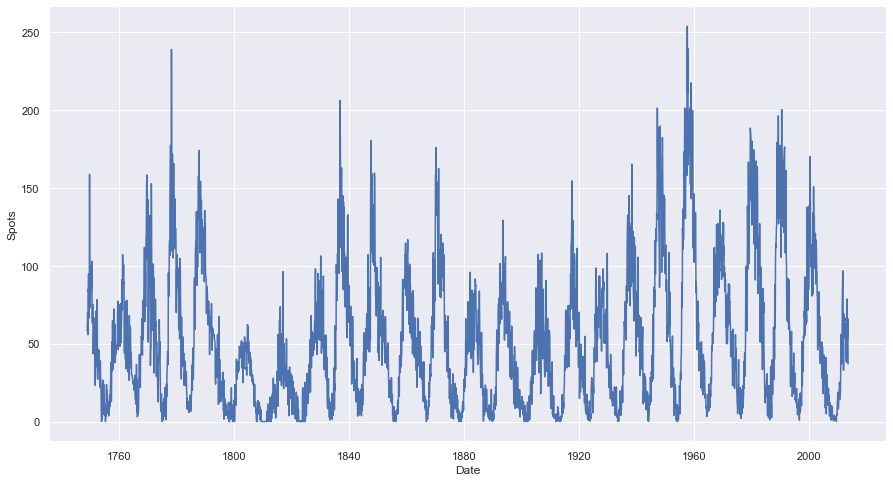

In [16]:
sns.lineplot(x=sunspots.index, y='spots', data=sunspots).set(xlabel='Date', ylabel='Spots');

- Return to the code at the beginning of the assignment and change the plot aspect ratio to improve how the plot is displayed. <span style="color:red" float:right>[1 point]</span>

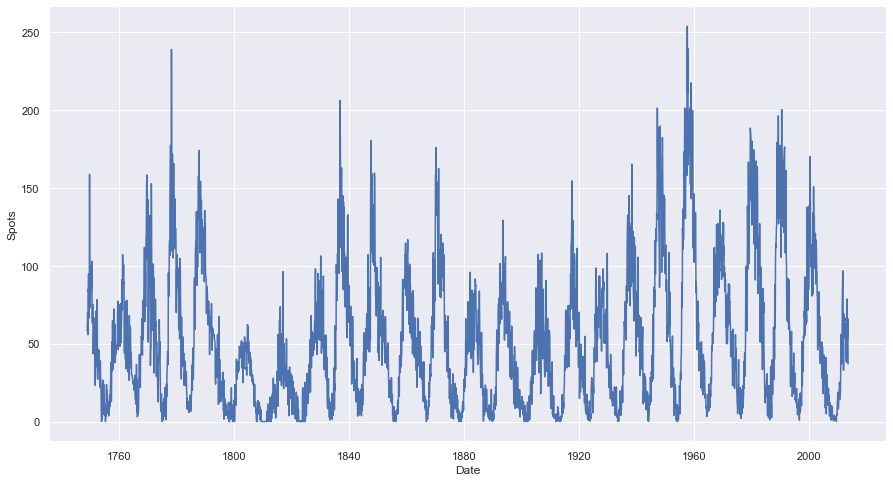

In [17]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x=sunspots.index, y='spots', data=sunspots).set(xlabel='Date', ylabel='Spots');

It is often helpful to smooth out a time series plot using a moving average. In `pandas`, we can easily calculate moving averages (or other statistic) using the `rolling` method. An example is shown below.

In [18]:
x = pd.Series([5, 9, 10, 4, 8])
x.rolling(3).mean()

0         NaN
1         NaN
2    8.000000
3    7.666667
4    7.333333
dtype: float64

- State why the first two values of series above are `NaN`. <span style="color:red" float:right>[2 point]</span>

Answer: The first two values of the seies are NaN due to the call not having enough values to calculate the 'rolling average'. If the command was x.rolling(2).mean() - then it would only have on NaN value. It bases the average off of the value (x) you put into the rolling(x) call, and thus will use the prior values to calculate that value. Therefore, if you put 25 into the call, then it will use the previous 24 values to create the average for the 25th row. 

- Create a new plot that shows both the original time series and the smoothed out time series using a rolling average with the window size set to 24. Your plot should include labels to indicate which line plot is which, such as 'original' and 'rolling average'. <span style="color:red" float:right>[5 point]</span>

In [19]:
sunspots['rol_avg_24']=sunspots['spots'].rolling(24).mean()
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3177 entries, 1749-01-01 to 2013-09-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   spots       3177 non-null   float64
 1   rol_avg_24  3154 non-null   float64
dtypes: float64(2)
memory usage: 74.5 KB


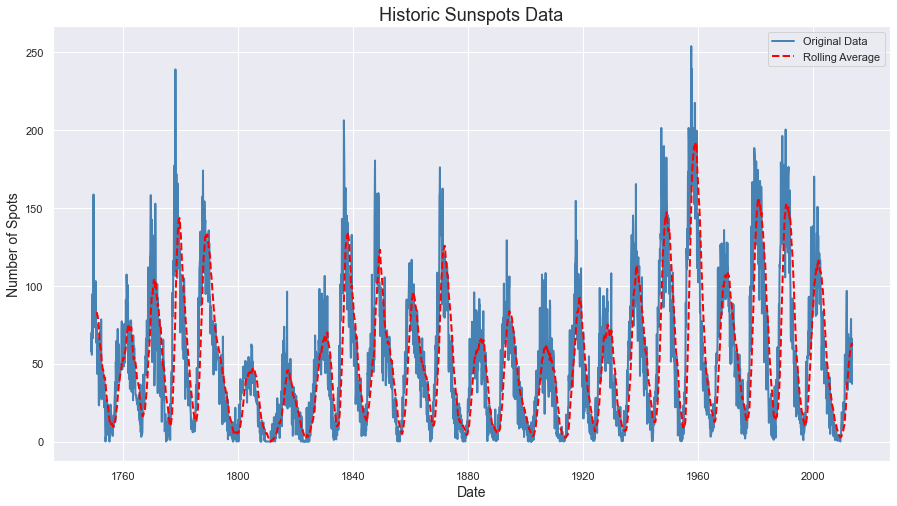

In [20]:
import matplotlib.pyplot as plt
plt.plot(sunspots['spots'], label='Original Data', color='steelblue', linewidth=2)
plt.plot(sunspots['rol_avg_24'], label='Rolling Average', color='red', linewidth=2, linestyle='dashed')

plt.ylabel('Number of Spots', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Historic Sunspots Data', fontsize=18)
plt.legend()
plt.show()

Another way to smooth out the data is to aggregate the data from monthly to yearly. There are different ways of doing that, but the easiest way is by using the `resample` method, as shown [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). Since we are going from monthly data to yearly, we call this **downsampling**. We can also use `resample` to **upsample** the data.

- Use resample to aggregate the data to yearly totals, then plot a line plot of the data. <span style="color:red" float:right>[5 point]</span>

In [21]:
sunspots.head()

,spots,rol_avg_24
date,,
1749-01-01,58.0,NaN
1749-02-01,62.6,NaN
1749-03-01,70.0,NaN
1749-04-01,55.7,NaN
1749-05-01,85.0,NaN


In [22]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/resample-time-series-data-pandas-python/

#sunspots_resample = sunspots.resample('Y').sum()
sunspots = sunspots.resample('Y').sum()
sunspots.head()

,spots,rol_avg_24
date,,
1749-12-31,971.1,0.000000
1750-12-31,1000.7,82.158333
1751-12-31,571.9,919.141667
1752-12-31,573.6,675.312500
1753-12-31,368.1,517.275000


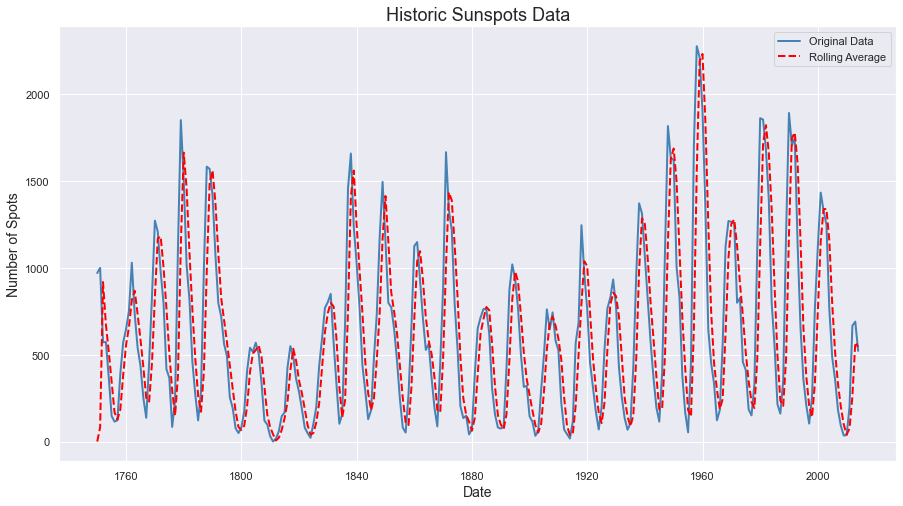

In [23]:
import matplotlib.pyplot as plt
plt.plot(sunspots['spots'], label='Original Data', color='steelblue', linewidth=2)
plt.plot(sunspots['rol_avg_24'], label='Rolling Average', color='red', linewidth=2, linestyle='dashed')

plt.ylabel('Number of Spots', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Historic Sunspots Data', fontsize=18)
plt.legend()
plt.show()

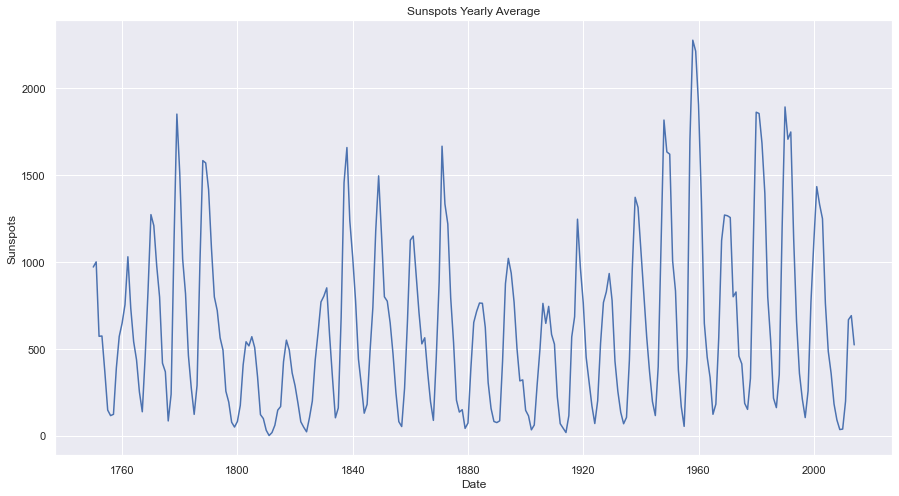

In [24]:
sns.lineplot(x=sunspots.index, y='spots', data=sunspots).set(xlabel='Date', ylabel='Sunspots', title='Sunspots Yearly Average');

The plot should show the number of sunspots on the vertical axis and the datetime on the horizontal axis. 

# End of assignment